In [89]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [90]:
# Variables
col_cv = ['Potential vs Li$^+$/Li (V)', 'Current (A)', 'Charge (C)', 'Time (s)', 'Current Density ($\mu$A/cm$^2$)', 'Scan']
potentials = [str(round(i, 2))  for i in np. arange(3.90, 4.20, 0.05)]
formatter = ticker.FuncFormatter(lambda x, pos: "{:.1f}".format(x * 1e6))
palette = 'cividis_r'

In [91]:
def setup_files(path):

    files = [os.path.join(path, i) for i in os.listdir(path)]
    folders = ['CV', 'lith', 'delith', 'EIS']
    cycles = ['C1', 'C2', 'C3', 'C4', 'C5']

    for i in folders:
        if not os.path.exists(os.path.join(path, i)):
            os.mkdir(os.path.join(path, i))

    if not os.path.exists(os.path.join(path, 'EIS', 'Relaxis')):
        os.mkdir(os.path.join(path, 'EIS', 'Relaxis'))
        
    for i in cycles:
        if not os.path.exists(os.path.join(path, 'EIS', 'Relaxis', i)):
            os.mkdir(os.path.join(path, 'EIS', 'Relaxis', i))
        if not os.path.exists(os.path.join(path, 'lith', i)):
            os.mkdir(os.path.join(path, 'lith', i))
        if not os.path.exists(os.path.join(path, 'delith', i)):
            os.mkdir(os.path.join(path, 'delith', i))
        
    for i in os.listdir(path):
        if 'EIS_' in i:
            os.rename(os.path.join(path, i), os.path.join(path, 'EIS', i))
    for i in os.listdir(os.path.join(path, 'EIS')):
        if 'relaxis' in i:
            os.rename(os.path.join(path, 'EIS', i), os.path.join(path, 'EIS', 'Relaxis', i))


    for i in os.listdir(os.path.join(path, 'EIS', 'Relaxis')):  
        if i[-6:-5] == '1':
            os.rename(os.path.join(path, 'EIS', 'Relaxis', i), os.path.join(path, 'EIS', 'Relaxis', 'C2', i))
        elif i[-6:-5] == '2':
            os.rename(os.path.join(path, 'EIS', 'Relaxis', i), os.path.join(path, 'EIS', 'Relaxis', 'C3', i))
        elif i[-6:-5] == '3':
                os.rename(os.path.join(path, 'EIS', 'Relaxis', i), os.path.join(path, 'EIS', 'Relaxis', 'C4', i))
        elif i[-6:-5] == '4':
            os.rename(os.path.join(path, 'EIS', 'Relaxis', i), os.path.join(path, 'EIS', 'Relaxis', 'C5', i))
        elif i[-5:] == 's.txt':
            os.rename(os.path.join(path, 'EIS', 'Relaxis', i), os.path.join(path, 'EIS', 'Relaxis', 'C1', i))
    
    for i in os.listdir(path):
        if '_lith_' in i:
            os.rename(os.path.join(path, i), os.path.join(path, 'lith', i))
        elif '_delith' in i:
            os.rename(os.path.join(path, i), os.path.join(path, 'delith', i))
        elif i != 'README.txt' and len(i) > 7:
            os.rename(os.path.join(path, i), os.path.join(path, 'CV', i))
       
    for i in os.listdir(os.path.join(path, 'lith')):
        if i[-6:-5] == '1':
            os.rename(os.path.join(path, 'lith', i), os.path.join(path, 'lith', 'C2', i))
        elif i[-6:-5] == '2':
            os.rename(os.path.join(path, 'lith', i), os.path.join(path, 'lith', 'C3', i))
        elif i[-6:-5] == '3':
            os.rename(os.path.join(path, 'lith', i), os.path.join(path, 'lith', 'C4', i))
        elif i[-6:-5] == '4':
            os.rename(os.path.join(path, 'lith', i), os.path.join(path, 'lith', 'C5', i))
        elif len(i) > 3:
            os.rename(os.path.join(path, 'lith', i), os.path.join(path, 'lith', 'C1', i))
    
    for i in os.listdir(os.path.join(path, 'delith')):
        if i[-6:-5] == '1':
            os.rename(os.path.join(path, 'delith', i), os.path.join(path, 'delith', 'C2', i))
        elif i[-6:-5] == '2':
            os.rename(os.path.join(path, 'delith', i), os.path.join(path, 'delith', 'C3', i))
        elif i[-6:-5] == '3':
            os.rename(os.path.join(path, 'delith', i), os.path.join(path, 'delith', 'C4', i))
        elif i[-6:-5] == '4':
            os.rename(os.path.join(path, 'delith', i), os.path.join(path, 'delith', 'C5', i))
        elif len(i) > 3:
            os.rename(os.path.join(path, 'delith', i), os.path.join(path, 'delith', 'C1', i))

def cc(path, area, thickness, sample):

    cv_path = os.path.join(path, 'CV')
    lith_path = os.path.join(path, 'lith')
    delith_path = os.path.join(path, 'delith')
    cv_df = pd.DataFrame()
    for i in os.listdir(cv_path):
        f = os.path.join(cv_path, i)
        df = pd.read_csv(f, sep = ';', skiprows = 1, names = col_cv)
        if '_Initial_' in i:
            df['CV'] = 'Initial'
        else:
            df['CV'] = 'Final'
        cv_df = pd.concat([cv_df, df], ignore_index=True)
        
    lith_path = os.path.join(path, 'lith')
    delith_path = os.path.join(path, 'delith')

    cycles = ['C1', 'C2', 'C3', 'C4', 'C5']

    lithiation = pd.DataFrame()
    delithiation = pd.DataFrame()
    capacity_l = pd.DataFrame(columns = ['Capacity (mAh/cm$^3$)', 'Cycle', 'L/D'])
    capacity_d = pd.DataFrame(columns = ['Capacity (mAh/cm$^3$)', 'Cycle', 'L/D'])
    efficiency = pd.DataFrame()
    n = 1
    for i in cycles:
        l = os.path.join(lith_path, i)
        for j in os.listdir(l):
            f = os.path.join(lith_path, i, j)
            df = pd.read_csv(f, sep = ';')
            df = df.rename(columns={'WE(1).Potential (V)': col_cv[0], 'Capacity (mAh/cm3)': 'Capacity (mAh/cm$^3$)'})
            df['Set'] = i[-1]
            df['Cycle'] =  n #str(n) ### string or int
            df['Capacity_calc'] = -df['WE(1).Charge (C)'] /3.6 / (area * 1e-7 * thickness)
            lithiation = pd.concat([lithiation, df], ignore_index=True)
            capacity_l.loc[n] = (max(df['Capacity_calc']), n, 'Lithiation')
            
            n += 1

    n = 1
    for i in cycles:
        d = os.path.join(delith_path, i)
        for j in os.listdir(d):
            f = os.path.join(delith_path, i, j)
            df = pd.read_csv(f, sep = ';')
            df = df.rename(columns={'WE(1).Potential (V)': col_cv[0], 'Capacity (mAh/cm3)': 'Capacity (mAh/cm$^3$)'})
            df['Set'] = i[-1]
            df['Cycle'] =  n
            df['Capacity_calc'] = df['WE(1).Charge (C)'] /3.6 / (area * 1e-7 * thickness)
            delithiation = pd.concat([delithiation, df], ignore_index=True)
            capacity_d.loc[n] = (max(df['Capacity_calc']), n, 'Delithiation')
            n += 1
    capacity = pd.concat([capacity_l, capacity_d], ignore_index=True)
    efficiency['Efficiency (%)'] = capacity_l['Capacity (mAh/cm$^3$)'] / capacity_d['Capacity (mAh/cm$^3$)'] * 100
    efficiency['Cycle'] = pd.Series(np.arange(0,26,1))

    ###
    results = [cv_df, lithiation, delithiation, capacity, efficiency]
    for i in results:
        i['Sample'] = sample
    ###
    return results #cv_df, lithiation, delithiation, capacity, efficiency

def eis(path, sample):
    
    # names = ['Potential vs Li/Li$^+$']
    col = ["Frequency (Hz)", "Z'", "-Z''", "Fit Frequency (Hz)", "Fit Z'", "Fit -Z''" ]
    
    files = [os.path.join(path, i) for i in os.listdir(path)]
    eis_data = pd.DataFrame()
    spectra = pd.DataFrame()

    n = 1 #Run
    k = 1 #Run for spectra
    for i in files:
        m = 0 #potential
       
        for j in os.listdir(i):
            
            if 'Fit' in j:
                fit_path = os.path.join(i, j)
                df = pd.read_csv(fit_path, sep = '\t', skiprows = 2)
                df = df.rename(columns={'FreeVariable' : 'Potential vs Li/Li$^+$', 
                                        'Resistance 1: value' : 'Electrolyte Resistance ($\Omega$)', 
                                        'Resistance 2: value' : 'Charge transfer Resistance ($\Omega$)' })
                df['Run'] = n
                eis_data = pd.concat([eis_data, df])
                n += 1
                
            if 'Spectra' in j:
                spectra_path = os.path.join(i, j)
                df_s = pd.read_csv(spectra_path, skiprows=4, sep = '\t', names=col)

                df_s[col[2]] = -df_s[col[2]]
                df_s[col[5]] = -df_s[col[5]]
                df_s['Potential vs Li/Li$^+$'] = potentials[m]
                df_s['Run'] = k
                spectra = pd.concat([spectra, df_s])
                m += 1
        k += 1
    eis_data['Sample'] = sample
    spectra['Sample'] = sample
    eis = [eis_data, spectra]
    return eis #eis_data, spectra


In [92]:
######################## Normal LMO ###########################################
sample = 'N_01'
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LESK32\SCE_mimic\Normal_N\N_01'
area = 0.785

# setup_files(path)

# CC
n_01 = cc(path, area, 80, sample)

# EIS
p = os.path.join(path, 'EIS\Relaxis')
n_01_eis = eis(p, sample)
# filter3 = eis_data3[eis_data3['Potential vs Li/Li$^+$'] == 4.]
# filter_s3 = spectra3[spectra3['Potential vs Li/Li$^+$'] == '4.0']

# # Plots
#############################################################################################################################################
# fig, ax = plt.subplots(2,2, dpi = 200, figsize = (15,12))
# sns.scatterplot(data = n_01[0], x = col_cv[0], y = col_cv[4], hue = 'CV', s = 3, edgecolor = None, palette=palette, ax = ax[0,0])
# sns.lineplot(data = n_01[1], x = 'Capacity (mAh/cm$^3$)', y = col_cv[0], hue = 'Cycle',  legend = False, ax = ax[0,1], palette = palette)
# sns.lineplot(data = n_01[2], x = 'Capacity (mAh/cm$^3$)', y = col_cv[0], hue = 'Cycle', legend = False, ax = ax[0,1], palette = palette)
# sns.scatterplot(data = n_01[3], x = 'Cycle', y = 'Capacity (mAh/cm$^3$)', hue = 'L/D', ax = ax[1,0], palette=palette )
# sns.scatterplot(data = n_01[4], x = 'Cycle', y = 'Efficiency (%)', ax = ax[1,1])
# ax[0,0].yaxis.set_major_formatter(formatter)
##############################################################################################################################################
# fig, ax = plt.subplots(2,2, dpi = 200, figsize = (15,12))
# sns.barplot(data = n_01_eis[0], x = 'Potential vs Li/Li$^+$', y = 'Charge transfer Resistance ($\Omega$)', hue = 'Run', palette = palette, ax = ax[0,0]) #Charge Trasfer Resistance
# sns.barplot(data = n_01_eis[0], x = 'Potential vs Li/Li$^+$', y = 'CPE Q 1: value', hue = 'Run', palette = palette, ax = ax[0,1]) # CPE Q 1
# sns.barplot(data = n_01_eis[0], x = 'Potential vs Li/Li$^+$', y = 'Electrolyte Resistance ($\Omega$)', hue = 'Run', palette = palette, ax = ax[1,0]) #Electrolyte resistance
# sns.scatterplot(data = n_01_eis[1], x = "Z'", y = "-Z''", hue = 'Potential vs Li/Li$^+$', style = 'Run', edgecolor = None, s = 5, palette = palette, ax = ax[1,1] ) # Spectra
# sns.scatterplot(data = filter_s3, x = "Z'", y = "-Z''", hue = 'Run', edgecolor = None, s = 20, palette = palette, ax = ax[1,1]) # Spectra 4.0 V
# sns.lineplot(data = filter_s3, x = "Fit Z'", y = "Fit -Z''", hue = 'Run', palette = palette, legend = False, ax = ax[1,1]) # Fit Spectra 4.0 V


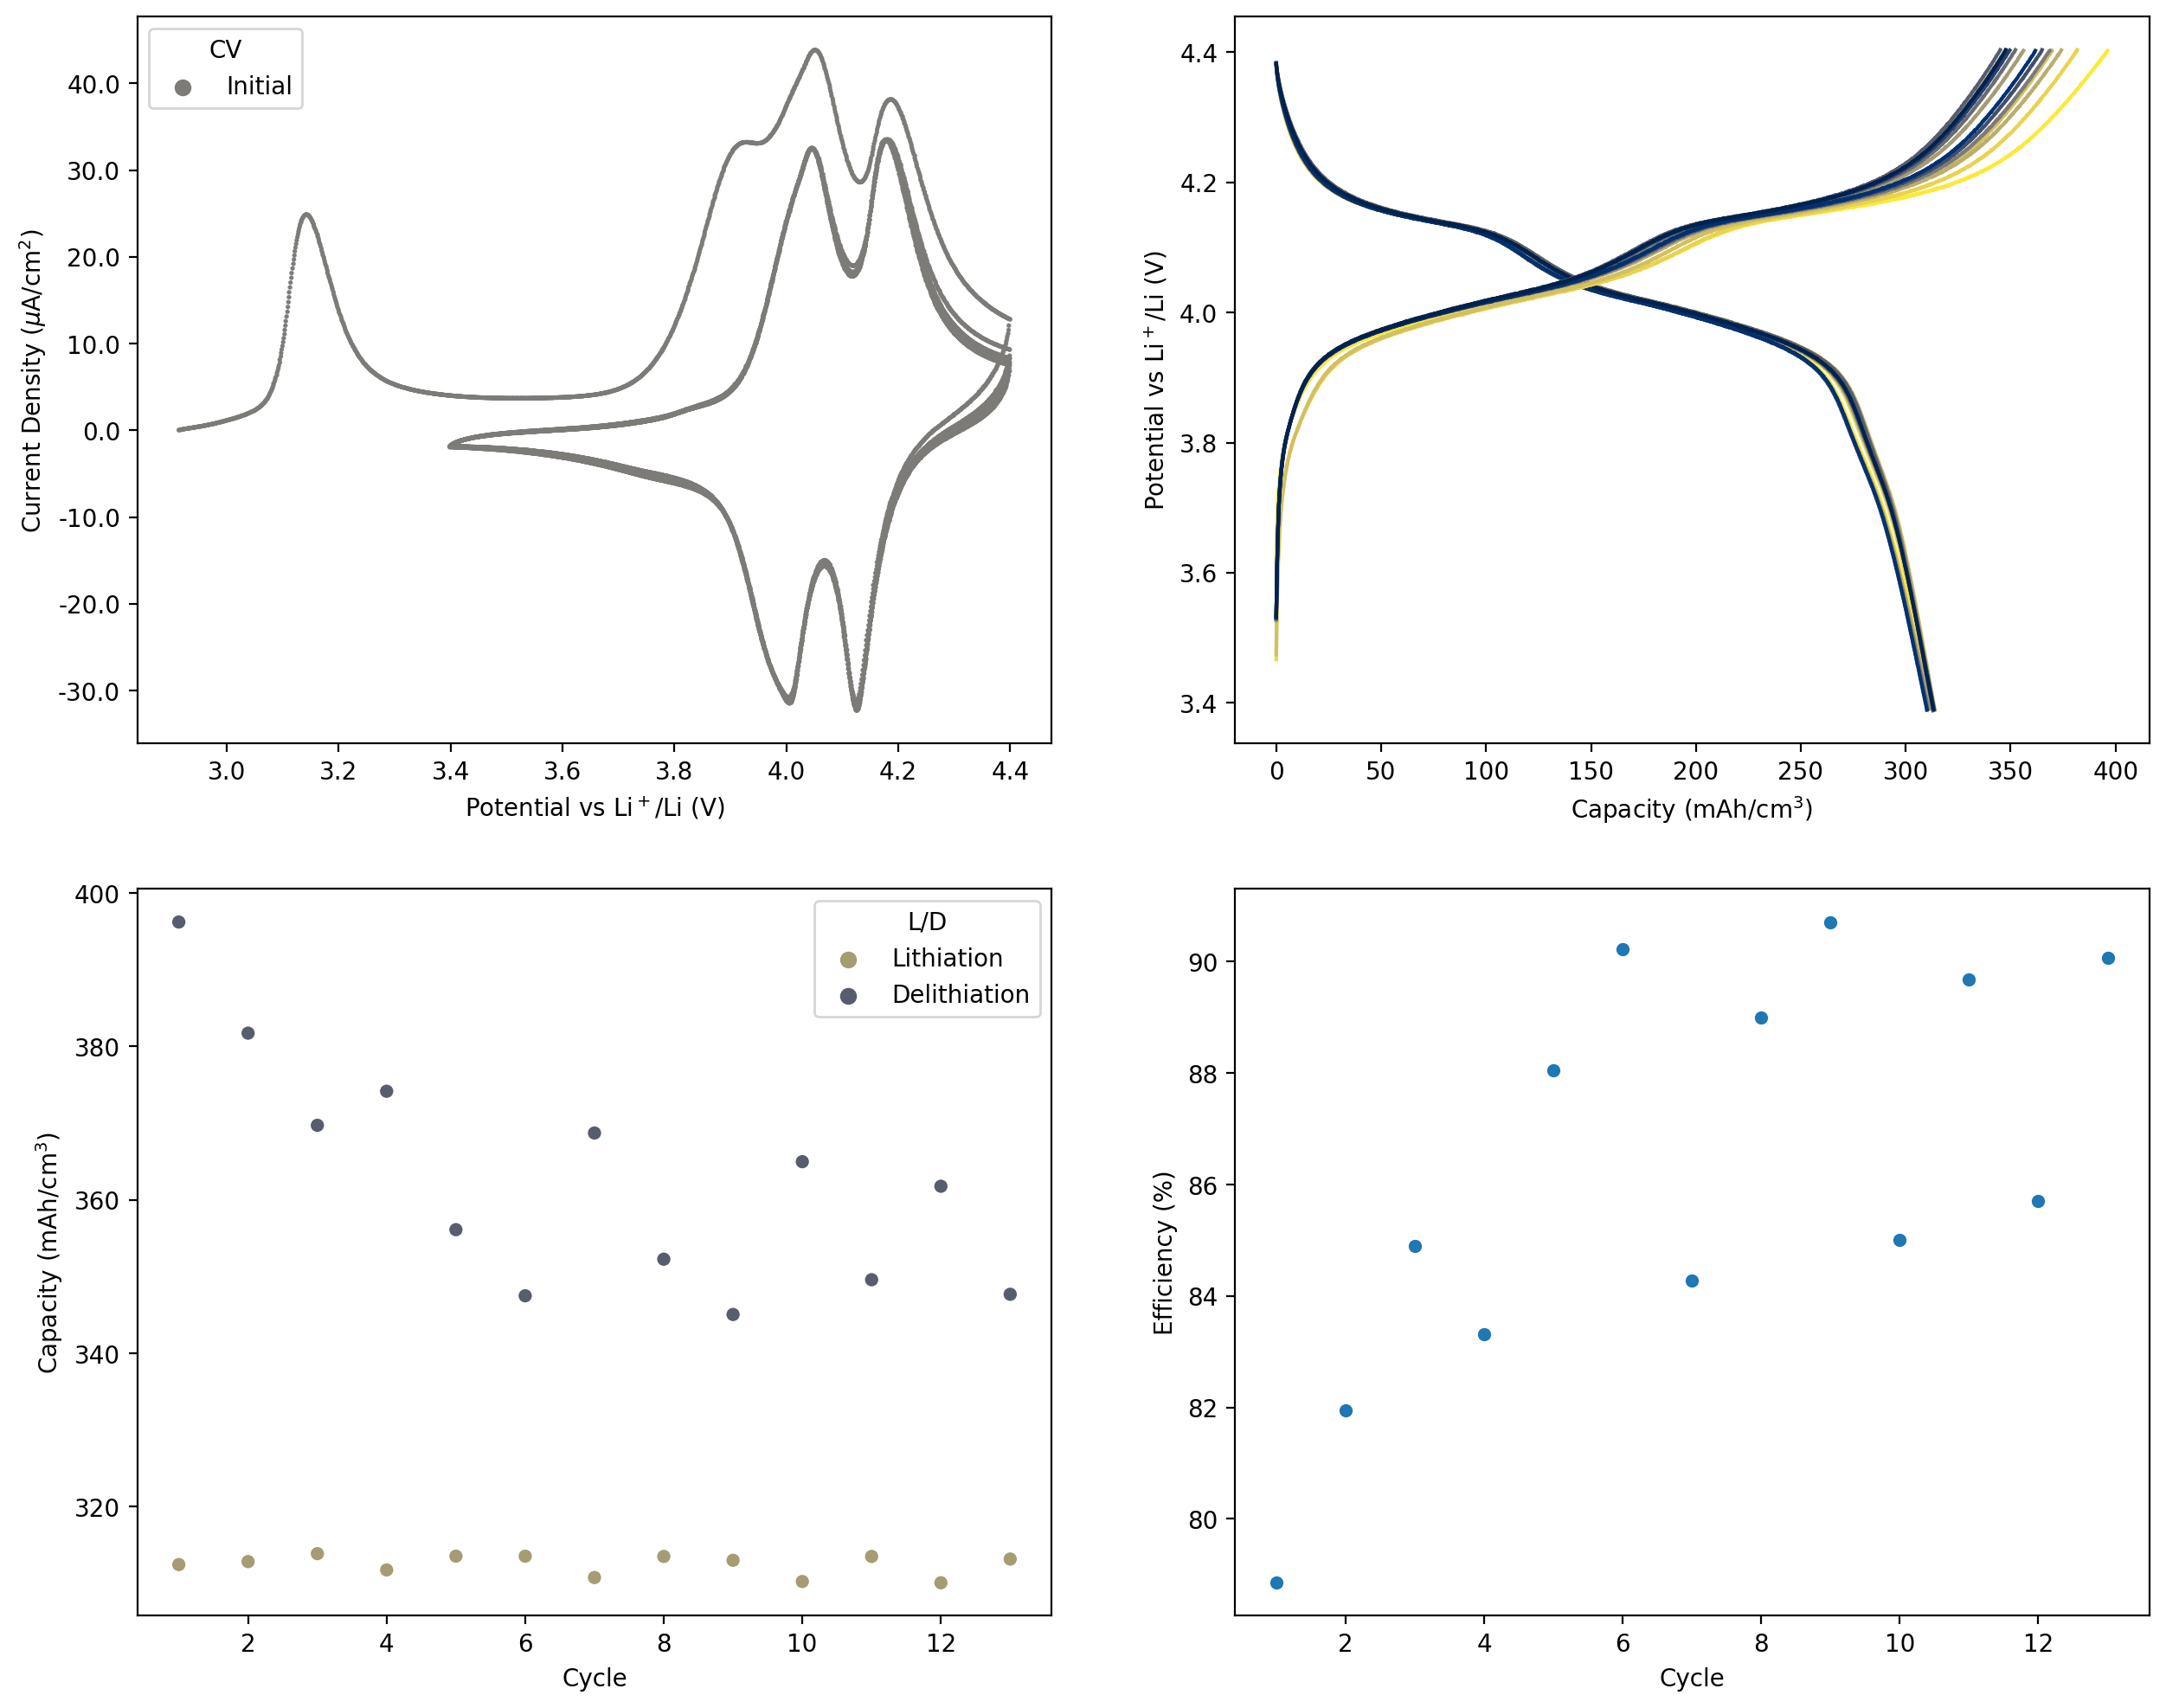

In [93]:
######################## Full Lithiation LMO ###########################################
sample = 'FL_01'
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LESK32\SCE_mimic\Full_Lith_FL\FL_01'
area = 0.785
palette = 'cividis_r'
# setup_files(path)

# # CC
fl_01 = cc(path, area, 80, sample)

# # EIS
p = os.path.join(path, 'EIS\Relaxis')
fl_01_eis = eis(p, sample)

# # Plots
#############################################################################################################################################
# fig, ax = plt.subplots(2,2, dpi = 200, figsize = (15,12))
# sns.scatterplot(data = fl_01[0], x = col_cv[0], y = col_cv[4], hue = 'CV', s = 3, edgecolor = None, palette=palette, ax = ax[0,0])
# sns.lineplot(data = fl_01[1], x = 'Capacity (mAh/cm$^3$)', y = col_cv[0], hue = 'Cycle',  legend = False, ax = ax[0,1], palette = palette)
# sns.lineplot(data = fl_01[2], x = 'Capacity (mAh/cm$^3$)', y = col_cv[0], hue = 'Cycle', legend = False, ax = ax[0,1], palette = palette)
# sns.scatterplot(data = fl_01[3], x = 'Cycle', y = 'Capacity (mAh/cm$^3$)', hue = 'L/D', ax = ax[1,0], palette=palette )
# sns.scatterplot(data = fl_01[4], x = 'Cycle', y = 'Efficiency (%)', ax = ax[1,1])
# ax[0,0].yaxis.set_major_formatter(formatter)
##############################################################################################################################################
# fig, ax = plt.subplots(2,2, dpi = 200, figsize = (15,12))
# sns.barplot(data = fl_01_eis[0], x = 'Potential vs Li/Li$^+$', y = 'Charge transfer Resistance ($\Omega$)', hue = 'Run', palette = palette, ax = ax[0,0]) #Charge Trasfer Resistance
# sns.barplot(data = fl_01_eis[0], x = 'Potential vs Li/Li$^+$', y = 'CPE Q 1: value', hue = 'Run', palette = palette, ax = ax[0,1]) # CPE Q 1
# sns.barplot(data = fl_01_eis[0], x = 'Potential vs Li/Li$^+$', y = 'Electrolyte Resistance ($\Omega$)', hue = 'Run', palette = palette, ax = ax[1,0]) #Electrolyte resistance
# sns.scatterplot(data = fl_01_eis[1], x = "Z'", y = "-Z''", hue = 'Potential vs Li/Li$^+$', style = 'Run', edgecolor = None, s = 5, palette = palette, ax = ax[1,1] ) # Spectra


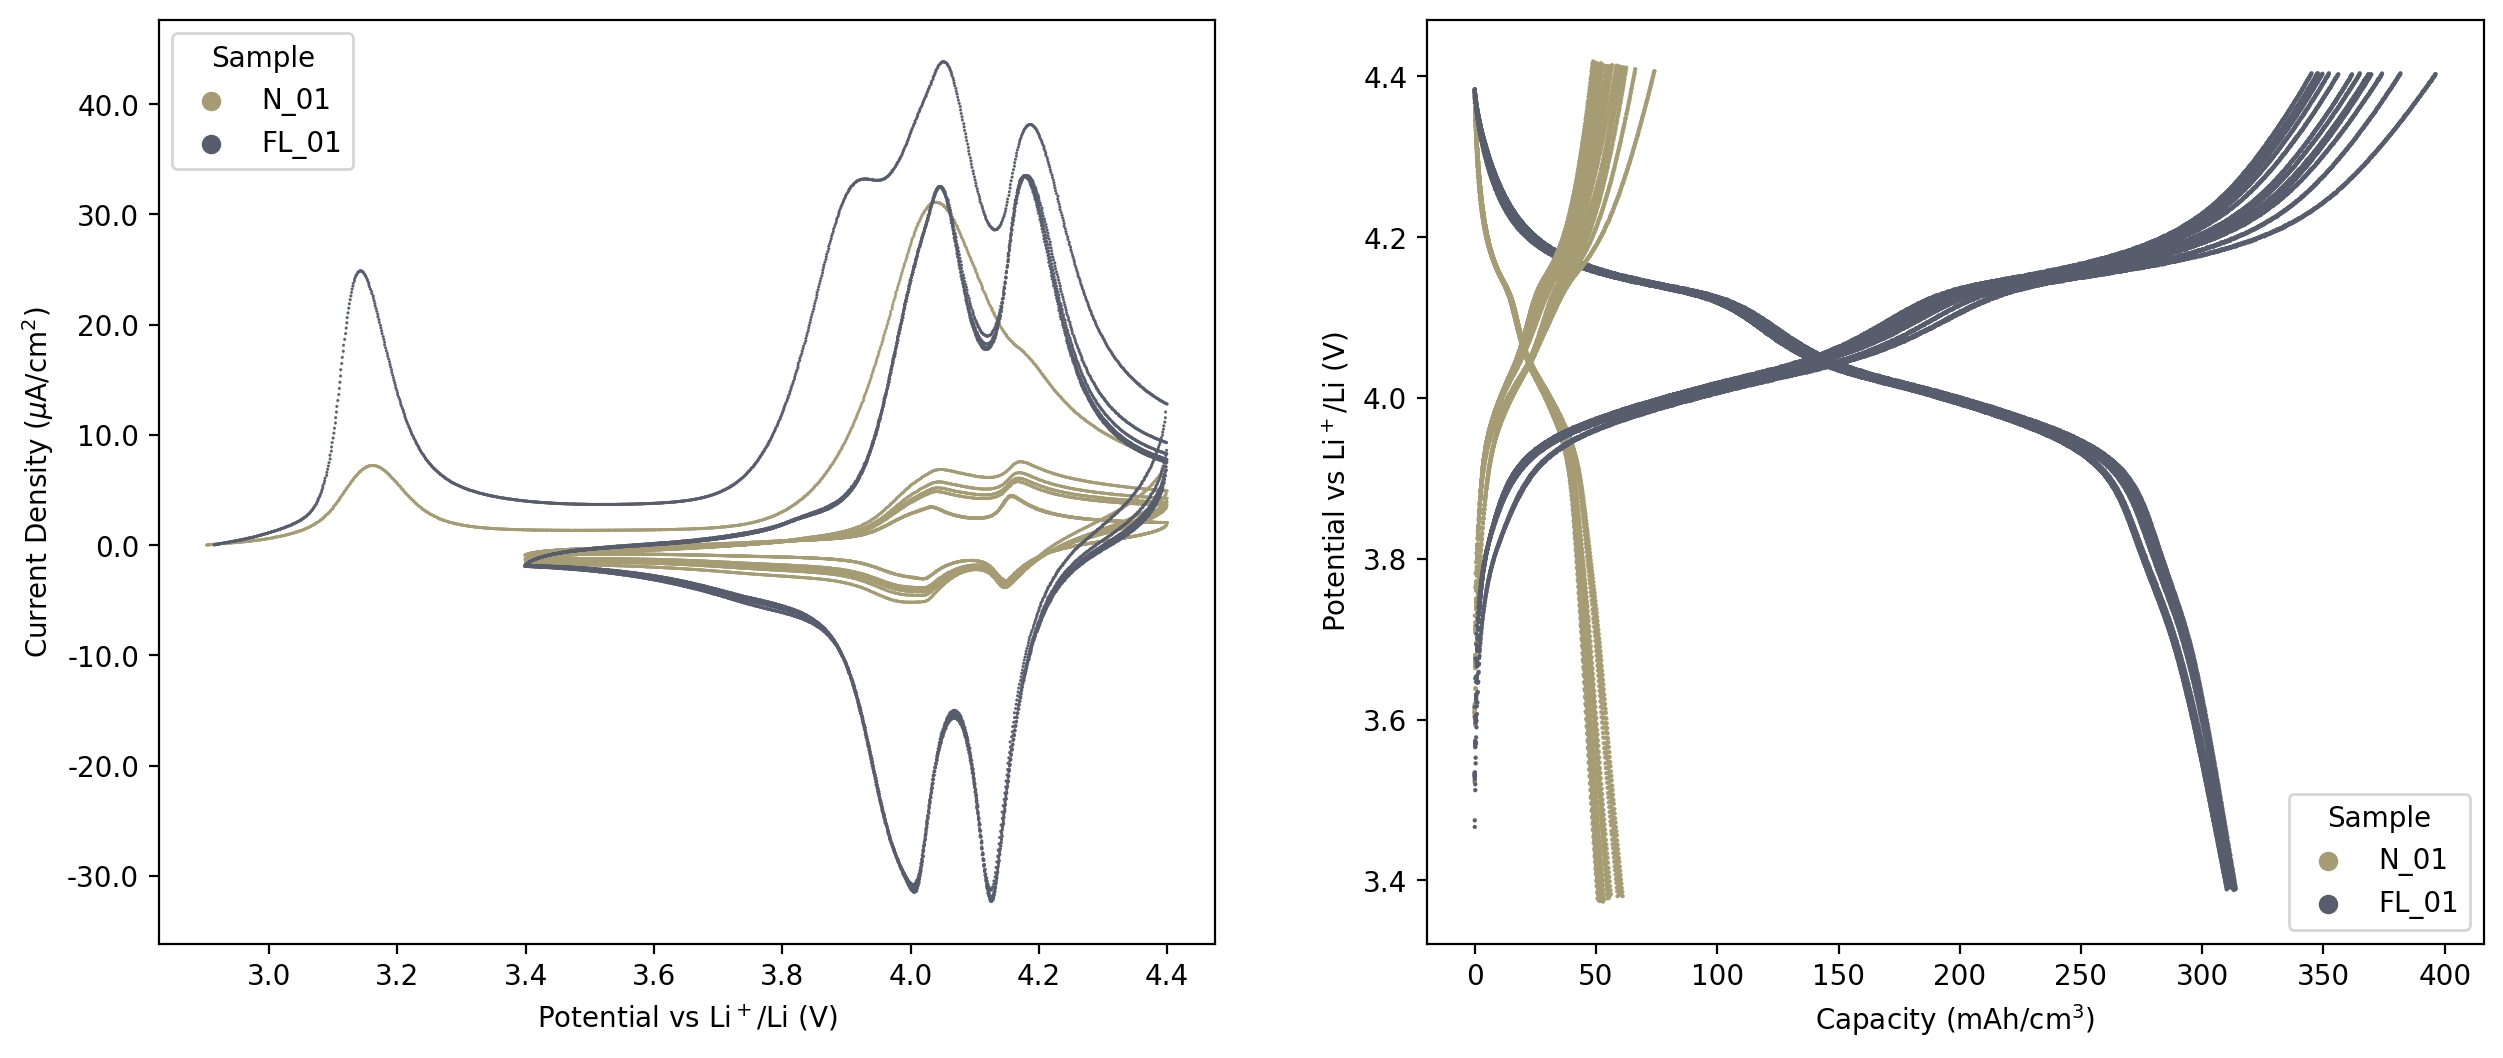

In [120]:
# Comparison

cv, l, d = pd.concat([n_01[0], fl_01[0]], ignore_index=True), pd.concat([n_01[1], fl_01[1]], ignore_index=True), pd.concat([n_01[2], fl_01[2]], ignore_index=True)
# impedance = pd.concat([n_01_eis, fl_01_eis], ignore_index=True)

# Plot
fig, ax = plt.subplots(1,2, dpi = 200, figsize = (15,6))
sns.scatterplot(data = cv, x = col_cv[0], y = col_cv[4], edgecolor = None, hue = 'Sample', s = 1, palette=palette, ax = ax[0])
sns.scatterplot(data = l, x = 'Capacity (mAh/cm$^3$)', y = col_cv[0], hue = 'Sample', ax = ax[1], edgecolor = None, s = 2, palette= palette)
sns.scatterplot(data = d, x = 'Capacity (mAh/cm$^3$)', y = col_cv[0], hue = 'Sample', ax = ax[1], edgecolor = None, s = 2, palette= palette, legend=False)
ax[0].yaxis.set_major_formatter(formatter)
